## Importing

In [ ]:
import matplotlib.pyplot as plt
import csv
import pprint
from operator import itemgetter

## Setting Up Amazon Top 50 Bestselling Book Data and Establishing Goal
Bring CSV data into program and then parse it.
Close the CSV file after the information has been read.

My goal is to see if there is a correlation between year and the number of reviews for books on the higher-rated bestsellers (reviews of 4.9 or higher) to gauge customer engagement / yr.

(I realized late into my project that year a book made the bestseller list does not necessarily mean the review was written that year.)

In [2]:
with open("bestsellers_with_categories.csv", "r",encoding="UTF-8") as datafile:
    book_data = csv.DictReader(datafile) # parses info into variable
    data_list = []
    
    for item in book_data:
        data_list.append(item)

## Format the data before we generate a visualization

First, create a new list to hold books with 4.9 ratings.

Next, turn the strings with number values into integers. If this fails based on the inclusion of a decimal (like for ratings), then turn the number from a string into a float.

Need the one book / year with rating of 4.9 and the highest number of reviews for that year. However, Dr. Suess' *Oh, the Places You'll Go!* was a bestseller from 2012-2019 AND had the highest number of reviews. If a book has the highest number of reviews for more than one year, then that book will be kept for the earliest year and the next highest reviewed, unused book will be appended to the next year.

Sorted the data by year because dictionaries are unordered and, therefore, my graph was also unordered.


In [3]:
#Variable for all items with 4.9 rating
highest_rated = []
for item in data_list:
    if item["User Rating"] == "4.9":
        highest_rated.append(item)

for hr in highest_rated: 
    for k, v in hr.items():
        try:
            hr[k] = int(v) # turns values into integers
        except ValueError:
            try:
                hr[k] = float(v) # except when error (like for ratings)
            except Exception:
                pass # sort highest_rated by year & reviews descending
            
# print("The list printed sorting by year and reviews: ")
# pprint.pprint(sorted(highest_rated, key=itemgetter("Year", "Reviews"), reverse=True))

# If book is used for multiple years, only keep for lesser of the years.
cleaned_books = {}
for item in highest_rated:
    if cur := cleaned_books.get(item["Name"]): # walrus is expression/ what comes back from .get (value)
        if cur["Reviews"] < item["Reviews"]:
            cleaned_books[item["Name"]] = item
        elif cur["Reviews"] == item["Reviews"]:
            if item["Year"] < cur["Year"]:
                cleaned_books[item["Name"]] = item
    else:
         cleaned_books[item["Name"]] = item
    
highest_rated = cleaned_books.values()
# pprint.pprint(sorted(highest_rated, key=itemgetter("Year", "Reviews")))
        
# If multiple with the same year, want to ONLY return book with the highest ratings.
highest_reviewed_per_year = {}

for item in highest_rated:
    if highest_reviewed_per_year.get(item["Year"]): # .get will check if value here
        if item["Reviews"] > highest_reviewed_per_year[item["Year"]]["Reviews"]: # if value for reviews in highest_rated is greater than value of review for new dictionary
                highest_reviewed_per_year[item["Year"]] = item # sets as key on highest_reviewed_per_year
    else:
        highest_reviewed_per_year[item["Year"]] = item
        
pprint.pprint(highest_reviewed_per_year)

top_per_year_list = sorted(highest_reviewed_per_year.values(), key=lambda x:x["Year"])


{2011: {'Author': 'Sarah Young',
        'Genre': 'Non Fiction',
        'Name': 'Jesus Calling: Enjoying Peace in His Presence (with Scripture '
                'References)',
        'Price': 8,
        'Reviews': 19576,
        'User Rating': 4.9,
        'Year': 2011},
 2012: {'Author': 'Dr. Seuss',
        'Genre': 'Fiction',
        'Name': "Oh, the Places You'll Go!",
        'Price': 8,
        'Reviews': 21834,
        'User Rating': 4.9,
        'Year': 2012},
 2013: {'Author': 'Eric Carle',
        'Genre': 'Fiction',
        'Name': 'The Very Hungry Caterpillar',
        'Price': 5,
        'Reviews': 19546,
        'User Rating': 4.9,
        'Year': 2013},
 2014: {'Author': 'Rush Limbaugh',
        'Genre': 'Fiction',
        'Name': 'Rush Revere and the First Patriots: Time-Travel Adventures '
                'With Exceptional Americans (2)',
        'Price': 12,
        'Reviews': 3836,
        'User Rating': 4.9,
        'Year': 2014},
 2015: {'Author': 'Brandon Stanto

## Start Visualization

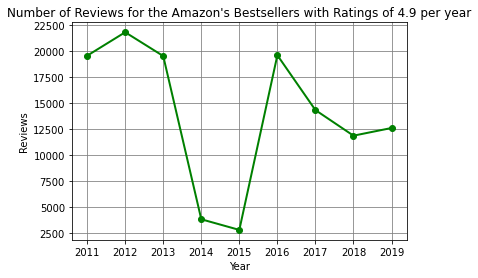

In [4]:
plt.title("Number of Reviews for the Amazon's Bestsellers with Ratings of 4.9 per year")
plt.xlabel("Year")
plt.ylabel("Reviews")

x, y = [], []

for item in top_per_year_list:
#     print(item)
    x.append(item["Year"])
    y.append(item["Reviews"])

plt.plot(x, y, color="green", linewidth = 2, marker = "o")
plt.grid(x, color="gray")
plt.show()

## Insight to Plot
Because the year a book was on the bestselling list is not synonymous with the year the reviews for the book were written, my graph does not compare customer engagement throughout the years as I had intended.

This does also point to other data analysis opportunities because the position of *Oh the Places You'll Go!* as the book with the highest number of reviews for multiple years and the highest number of reviews on my graph could predict a correlation between numbers a book has been on the bestsellers list and the number of reviews received.

In general, the low number of reviews for the books from 2014 & 2015 also suggest there may not be a correlation between the number of reviews a book receives and its rating as well as the number of reviews and a book's position on the Top 50 Bestselling Book List.
